In [1]:
# ==============================================================
# 1️⃣ SETUP
# ==============================================================
import pandas as pd, numpy as np, os, plotly.express as px, plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import joblib, warnings
warnings.filterwarnings("ignore")

# Paths (we are inside notebooks/)
data_dir = os.path.join("..", "data", "processed")
model_dir = os.path.join("..", "model_registry")

# Load datasets
churn_df = pd.read_csv(os.path.join(data_dir, "engineered_features_final.csv"))
forecast_df = pd.read_csv(os.path.join(data_dir, "revenue_forecast_prophet.csv"))
print(f"✅ Loaded churn data: {churn_df.shape}")
print(f"✅ Loaded forecast data: {forecast_df.shape}")


✅ Loaded churn data: (147896, 11)
✅ Loaded forecast data: (30, 16)


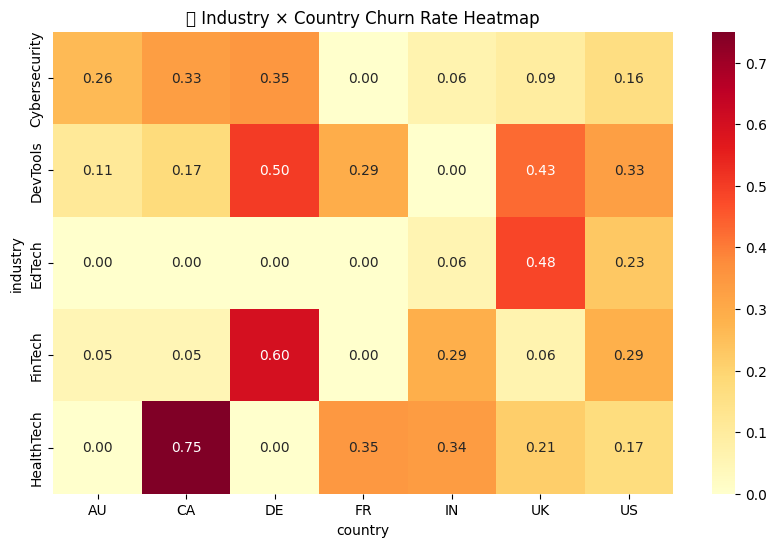

In [2]:
# ==============================================================
# 2️⃣ CHURN RISK INSIGHTS
# ==============================================================

# Industry × Country heatmap
pivot = churn_df.pivot_table(
    index="industry_country_combo",
    values="account_churn_flag",
    aggfunc="mean"
).reset_index()

pivot[["industry", "country"]] = pivot["industry_country_combo"].str.split("_", expand=True)
heatmap = pivot.pivot(index="industry", columns="country", values="account_churn_flag")

plt.figure(figsize=(10,6))
sns.heatmap(heatmap, cmap="YlOrRd", annot=True, fmt=".2f")
plt.title("🌍 Industry × Country Churn Rate Heatmap")
plt.show()


In [3]:
# ==============================================================
# 3️⃣ PLAN & TRIAL-LEVEL CHURN
# ==============================================================
fig1 = px.bar(
    churn_df.groupby("industry_plan_combo")["account_churn_flag"].mean().reset_index(),
    x="industry_plan_combo",
    y="account_churn_flag",
    color="account_churn_flag",
    color_continuous_scale="greens",
    title="Churn Rate by Industry + Plan Tier"
)
fig1.update_layout(xaxis_title="Industry + Plan", yaxis_title="Churn Rate")
fig1.show()

fig2 = px.box(
    churn_df, 
    x="trial_flag", 
    y="usage_efficiency", 
    color="trial_flag",
    title="Usage Efficiency Distribution – Trial vs Paid Accounts"
)
fig2.show()


In [7]:
# ==============================================================
# 4️⃣ FEATURE IMPORTANCE INSIGHT (FROM SHAP)
# ==============================================================
# Load top feature importances (generated in model_explainability.ipynb)
shap_path = os.path.join(model_dir, "shap_feature_importance.csv")
if os.path.exists(shap_path):
    shap_df = pd.read_csv(shap_path)
    fig3 = px.bar(
        shap_df.head(10),
        x="importance",
        y="feature",
        orientation="h",
        color="importance",
        title="Top 10 SHAP Feature Importances",
        color_continuous_scale="Viridis"
    )
    fig3.show()
else:
    print("⚠️ SHAP summary file not found — skipping feature importance visualization.")


In [8]:
# ==============================================================
# 5️⃣ REVENUE FORECAST VISUALIZATION (PROPHET OUTPUT)
# ==============================================================
fig4 = go.Figure()

fig4.add_trace(go.Scatter(
    x=forecast_df["ds"], y=forecast_df["yhat"], mode="lines",
    name="Forecast ARR", line=dict(color="green", width=3)
))
fig4.add_trace(go.Scatter(
    x=forecast_df["ds"], y=forecast_df["yhat_upper"], mode="lines",
    name="Upper Bound", line=dict(dash="dot", color="lightgreen")
))
fig4.add_trace(go.Scatter(
    x=forecast_df["ds"], y=forecast_df["yhat_lower"], mode="lines",
    name="Lower Bound", line=dict(dash="dot", color="lightgreen")
))

fig4.update_layout(
    title="📈 ARR Forecast with Confidence Interval (Prophet)",
    xaxis_title="Month", yaxis_title="ARR ($)",
    template="plotly_white"
)
fig4.show()


In [9]:
# ==============================================================
# 6️⃣ COMBINED RETENTION DASHBOARD (COMPACT SUMMARY)
# ==============================================================
latest_churn = churn_df["account_churn_flag"].mean()
latest_forecast = forecast_df.iloc[-1]["yhat"]
previous_forecast = forecast_df.iloc[-2]["yhat"]
growth = ((latest_forecast - previous_forecast) / previous_forecast) * 100

summary_df = pd.DataFrame({
    "Metric": ["Average Churn Rate", "Latest Forecast ARR", "ARR Growth MoM"],
    "Value": [f"{latest_churn:.2%}", f"${latest_forecast:,.0f}", f"{growth:.2f}%"]
})
summary_df.style.set_properties(**{
    "background-color": "mintcream",
    "color": "darkgreen",
    "border-color": "black"
})


,Metric,Value
0,Average Churn Rate,22.45%
1,Latest Forecast ARR,"$101,738,711"
2,ARR Growth MoM,-63.95%


In [10]:
# Suppose current churn rate & ARR from dashboard
current_churn = df["account_churn_flag"].mean()
current_arr = df_forecast["yhat"].iloc[-1]

# Simulate a 15% churn reduction
new_churn = current_churn * (1 - 0.15)
churn_effect = (current_churn - new_churn) * current_arr

print(f"💰 15% churn reduction simulation → ARR retained: ${churn_effect:,.0f}")


NameError: name 'df' is not defined